# Determine brand markup, pricing strategies and trends for non-luxury and luxury brands.

## Step 1. Import libraries needed for EDA (exploratory data analysis)

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
#https://data.world/datafiniti/womens-shoe-prices

In [41]:
df = pd.read_csv("7210_1.csv")

/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (13,16,18,22,24,32,33,40,41,47,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Step 2. Load dataset & display the first 3 rows

In [42]:
df.head(3)

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3. Get a summary of the data

In [43]:
print(df.info())
#print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33801 non-null  object 
 1   asins                2422 non-null   object 
 2   brand                32817 non-null  object 
 3   categories           33801 non-null  object 
 4   colors               19844 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            33801 non-null  object 
 7   dateUpdated          33801 non-null  object 
 8   descriptions         28425 non-null  object 
 9   dimension            1177 non-null   object 
 10  ean                  9778 non-null   float64
 11  features             27181 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            22309 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 33801 non-null 

## Step 4. Clean the data

## We have several columns that don't have *any* values, such as *count*, *flavors*, *isbn*, etc., as well as the last four columns that are unnamed. We will clean the dataset and get it ready for analysis by dropping irrelevant columns, dealing with NAs and duplicates, etc. 

In [50]:
# Get relevant variables
df = df[['id', 'brand', 'prices.amountMin','prices.amountMax','prices.isSale', 'prices.currency','imageURLs']]
print("The shape of the data frame is:", df.shape)

# Remove duplicate rows
df = df.drop_duplicates()

#df.sort_values(by = 'brand')
#print(df.brand.unique())
print("There are", len(df.brand.unique()), "different brands.")

The shape of the data frame is: (20493, 7)
There are 1361 different brands.


In [57]:
# Create new column for average price
df['prices.avg'] = (df['prices.amountMin'] + df['prices.amountMax'])/2
print(df.info())
#print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20493 entries, 0 to 33800
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20493 non-null  object 
 1   brand             19510 non-null  object 
 2   prices.amountMin  20493 non-null  float64
 3   prices.amountMax  20493 non-null  float64
 4   prices.isSale     20493 non-null  bool   
 5   prices.currency   20493 non-null  object 
 6   imageURLs         16733 non-null  object 
 7   prices.avg        20493 non-null  float64
dtypes: bool(1), float64(3), object(4)
memory usage: 1.3+ MB
None


In [58]:
print(df[df['prices.currency']=='GBP']['prices.avg'])
print(df[df['prices.currency']=='GBP']['prices.currency'])

9336    94.99
Name: prices.avg, dtype: float64
9336    GBP
Name: prices.currency, dtype: object


## Since we have five different currencies, we need to convert them all into USD.

In [59]:
# Convert currencies to USD
df.loc[df['prices.currency']=='GBP', 'prices.avg'] *= 1.3
df.loc[df['prices.currency']=='AUD', 'prices.avg'] *= .75
df.loc[df['prices.currency']=='CAD', 'prices.avg'] *= .73
df.loc[df['prices.currency']=='EUR', 'prices.avg'] *= 1.1

## Which product was most expensive? Most common?

### We can see below that the prices are extremely skewed to the right, meaning that there are some shoes that are *much* more expensive than others. It also tells us that most shoe prices range between \\$0-\\$200, but many go far beyond that range. 

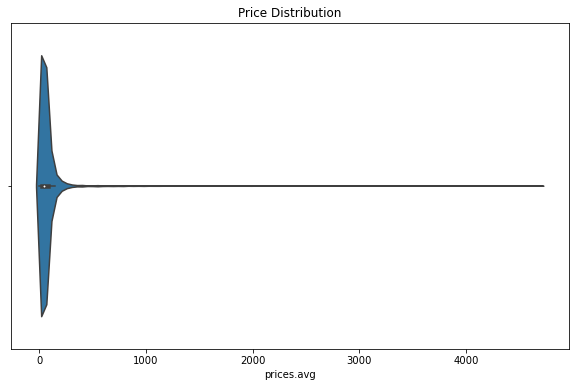

In [60]:
# Is there a typical price distribution (e.g.,normal) across brands or within specific brands?
plt.figure(figsize=(10,6))
plt.title("Price Distribution")
#sns.boxplot(x=df['prices.amountMin'])
sns.axes_style("dark")
sns.violinplot(x=df["prices.avg"])
plt.show()

/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of prices.amountMin')

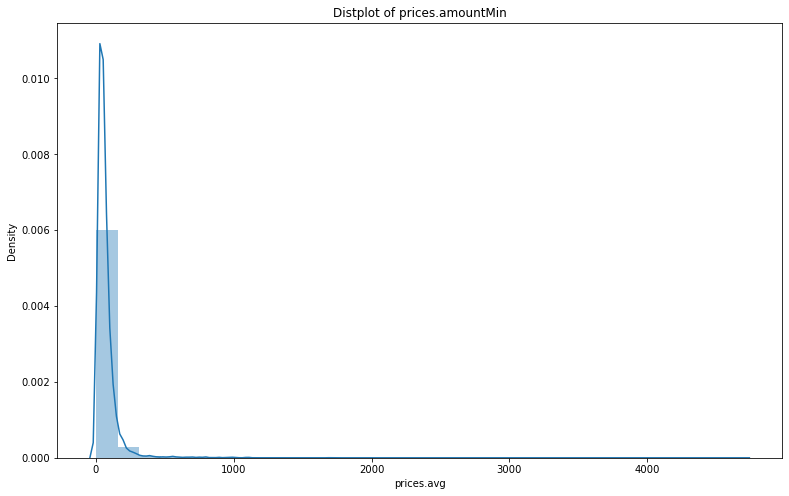

In [61]:
plt.figure(1 , figsize = (13 , 8))
sns.distplot(df['prices.avg'] , bins = 30)
plt.title('Distplot of {}'.format('prices.amountMin'))

## Let's sort the brands by each of their average prices. The table below shows the 5 most expensive brands and the 5 cheapest brands. Interestingly, the most expensive brand is "JewelsObsession" which does not sound like a shoe brand. We will investigate further below.

In [62]:
pd.DataFrame(df.groupby(['brand'])['prices.avg'].mean()).sort_values(by='prices.avg', ascending=False)

,prices.avg
brand,
JewelsObsession,3100.656667
Valentino,1241.110000
Simone Rocha,1120.000000
MALONE SOULIERS,1100.000000
Nicholas Kirkwood,1095.000000
...,...
Tred Mates,3.010000
TOUCHSTONE,2.992500
La Blanca,2.750000


## The price range is clearly very wide for the entire dataset. To get a more granular view of our data, let's split brands into 3 segments: cheap, mid-range, and luxury.

In [63]:
# if prices is between 0 and 100: cheap 
# if prices is between 100 and 400: mid-range
# if prices is greater than 400: luxury

def divide(row):
    if row['prices.avg'] <= 100:
        val = 'cheap'
    elif row['prices.avg'] > 100 and row['prices.avg'] <= 400: 
        val = 'mid-range'
    else:
        val = 'luxury'
    return val

df['prices.avg'] = pd.to_numeric(df['prices.avg'])
df['price_category'] = df.apply(divide, axis=1)

In [64]:
df.head()

,id,brand,prices.amountMin,prices.amountMax,prices.isSale,prices.currency,imageURLs,prices.avg,price_category
0,AVpe__eOilAPnD_xSt-H,Novica,62.99,62.99,False,USD,NaN,62.99,cheap
4,AVpe__eOilAPnD_xSt-H,Novica,62.99,62.99,True,USD,NaN,62.99,cheap
6,AVpe__eOilAPnD_xSt-H,Novica,56.69,56.69,False,USD,NaN,56.69,cheap
7,AVpe__JXilAPnD_xSt3F,Pedi Couture,30.00,30.00,False,USD,https://i5.walmartimages.com/asr/20e1735e-44ea...,30.00,cheap
8,AVpe_0mrilAPnD_xSqI7,ANNE KLEIN SPORT,100.00,100.00,False,USD,https://i5.walmartimages.com/asr/a46ef448-e801...,100.00,cheap


## Let's look at the 20 most expensive brands:

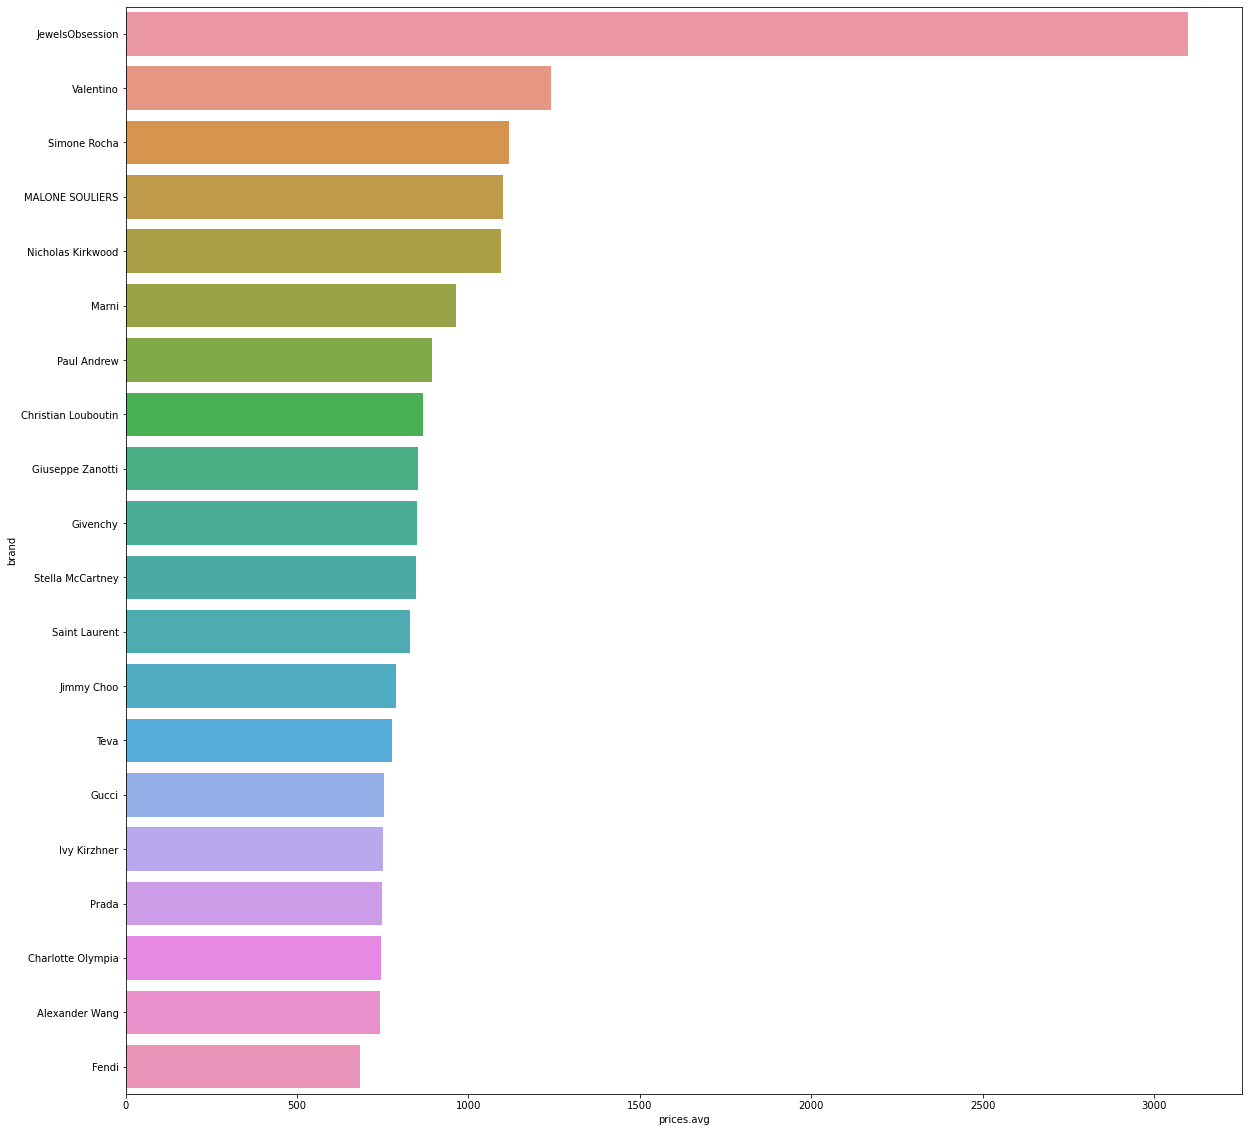

In [66]:
# The 32 most expensive brands
mean_price_by_brand= pd.DataFrame(df.groupby(['brand'])['prices.avg'].mean())
mean_price_by_brand = mean_price_by_brand.reset_index()
df_mean_price = mean_price_by_brand.sort_values(by='prices.avg', ascending=False).head(20)

plt.figure(figsize=(20,20))
#luxury = df_mean_price[df_mean_price['price_category'] == 'luxury'].sort_values(by='prices.avg', ascending=False)
ax = sns.barplot(x="prices.avg", y="brand", data=df_mean_price)

/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

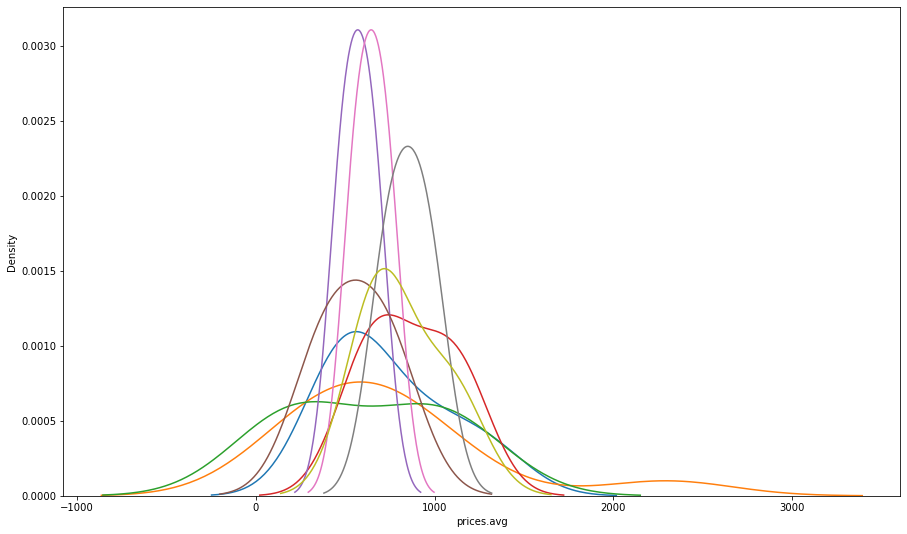

In [67]:
plt.figure(figsize=(15,9))

luxury_brands = ['Prada','Gucci','Burberry','Christian Louboutin','Balenciaga','Yves Saint Laurent', 'Chloe', 'Givenchy','Saint Laurent']
for brand in luxury_brands:
    sns.distplot(df[df['brand'] == brand]['prices.avg'], hist=False,label = brand)

/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

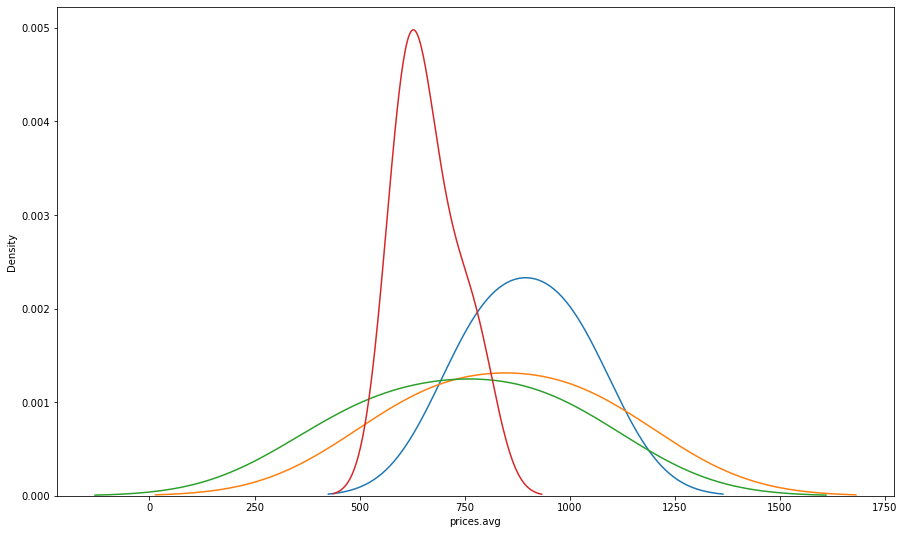

In [68]:
plt.figure(figsize=(15,9))

luxury_brands2 = ['Paul Andrew','Stella McCartney','Alexander Wang','Lanvin']
for brand in luxury_brands2:
    sns.distplot(df[df['brand'] == brand]['prices.avg'], hist=False,label = brand)

/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

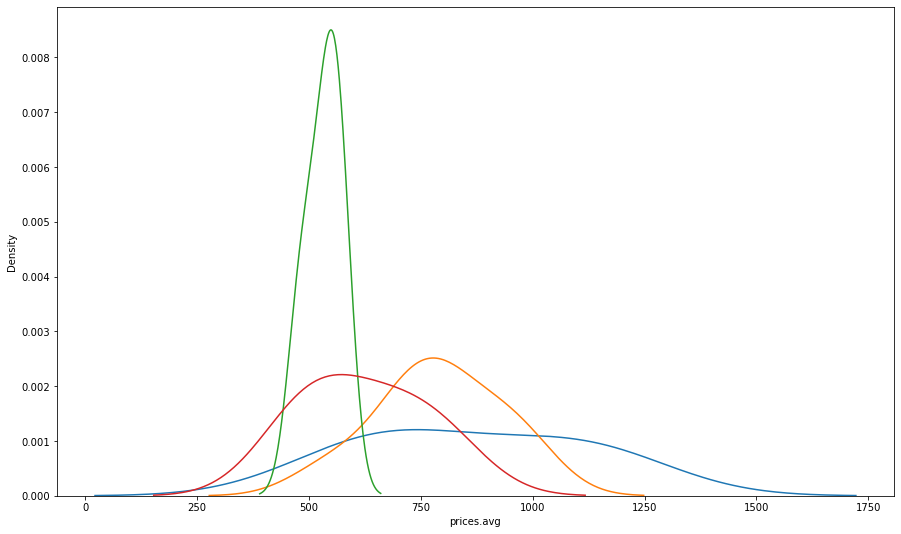

In [69]:
plt.figure(figsize=(15,9))
# YSL - double dip
luxury_shoe_brands = ['Christian Louboutin', 'Jimmy Choo', 'Golden Goose', "Tod's"]
for brand in luxury_shoe_brands:
    sns.distplot(df[df['brand'] == brand]['prices.avg'], hist=False,label = brand)

In [31]:
df['brand'].value_counts()

Nike                          533
Journee Collection            507
Novica                        430
TOMS                          406
Easy Spirit                   345
                             ... 
Corky's Footwear                1
Tamaris                         1
Breckelles                      1
Sesame Street                   1
Soft Style by Hush Puppies      1
Name: brand, Length: 1360, dtype: int64

0 Nike
1 Journee Collection
2 Novica
3 TOMS
4 Easy Spirit
5 Skechers
6 Nine West
7 VANS
8 New Balance
9 Dearfoams
10 Nina
11 Nature Breeze
12 In-Sattva
13 Ralph Lauren
14 Bearpaw
15 MUK LUKS
16 White Mountain
17 Aerosoles
18 Propet
19 Pleaser


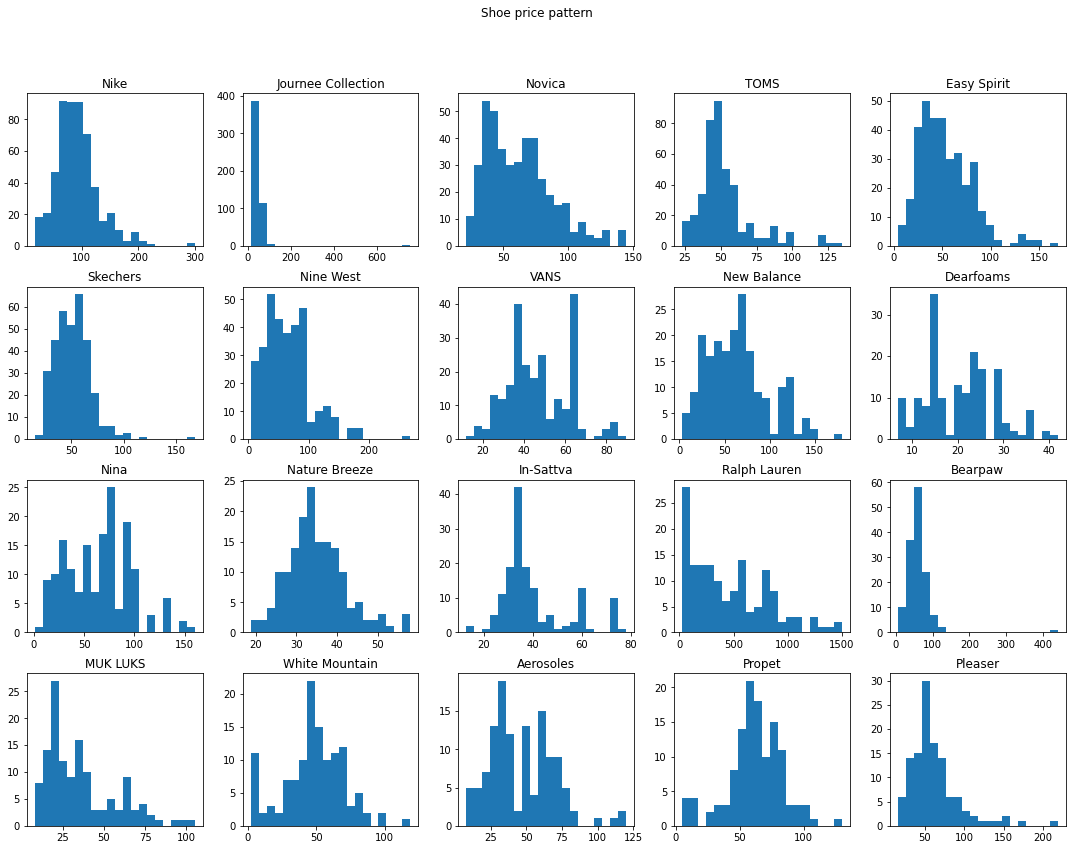

In [32]:
# Now, let's look at brands with the most items. We can see a lot
# We can notice that the double-dip pricing model is much less common
fig,axs = plt.subplots(4,5,figsize=(15,12))


for idx,brand in enumerate(df['brand'].value_counts().sort_values(ascending=False)[0:20].index):
    print(idx,brand)
    axs[idx//5,idx%5].hist(df[df['brand']==brand]['prices.avg'], bins=20)
    axs[idx//5,idx%5].set_title(brand)
plt.suptitle("Shoe price pattern")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()